# Credit Card Fraud Project

## Goal of this Project

- Practice building different machine learning models to detect fraud
- Understand how to evaluate different models and improve models

## Data Source

The data can be found on [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud). Due to privacy issue, PAC was conducted on the dataset so we don't have the original features. The only original features we have are: **time**, **amount** and **flag**
that can indicate fraud or not.

## Explore the data

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
%matplotlib inline

In [2]:
# import data

raw_data = pd.read_csv('creditcard.csv')

In [3]:
# a glance at the data

raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# info about data

raw_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# check if any value is missing

raw_data.isna().sum().sum()

0

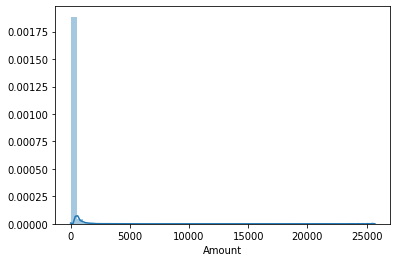

In [6]:
# distribution of amount

sns.distplot(raw_data['Amount'], bins = 50)

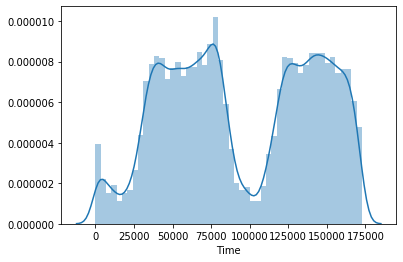

In [7]:
# distribution of time

sns.distplot(raw_data['Time'])

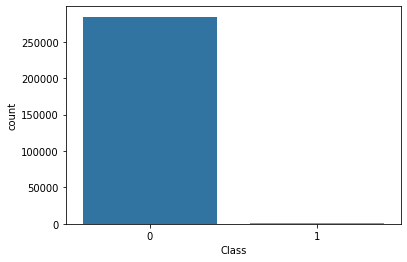

In [8]:
# Target Variable

sns.countplot(raw_data['Class'])

In [9]:
raw_data.groupby('Class')['Class'].count()

Class
0    284315
1       492
Name: Class, dtype: int64

Based on the information above, we learned:

1. There is no missing value in the data so we don't have to impute missing value.
2. **The feature amount doesn't follow normal distribution**. Since feature standardization is usually performed before PCA, we need to **transform these two features**.
3. Since the time represents seconds elapsed between each transaction and the first transaction in the dataset instead of actual time when transaction happened, we will drop this feature.
4. From the barchart we can see that we have an **imbalanced dataset**. Only 0.17% of the examples are fraud. We need resample to make sure we have a good model. Otherwise, the model will just predict non-fraud for every examples.

## Feature transformation

In [10]:
# import libraries

from sklearn.preprocessing import StandardScaler

In [11]:
# Transform 'amount' and drop 'time'

raw_data['transAmount'] = StandardScaler().fit_transform(raw_data['Amount'].values.reshape(-1,1))
data = raw_data.drop(['Time','Amount'], axis = 1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,transAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


## Building Models

In this section, I will train different models. First, I will build models after train test split. Then I will undersample the training set due to limited number of positive examples. It will be interesting to see if undersample can improve the performance of the models.

### Train Test Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = data.drop('Class', axis = 1)
y = data['Class']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=33)

### No undersampling

#### 1. Logistic Regression

I start with logistic regression because it's widely used and easy to understand. I will try different models later.

In [15]:
# library for building model, finding the best parameter and evaluating models

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, recall_score, make_scorer, precision_recall_curve

Usually we use accuracy, precision and recall to evaluate a classification model. In this case, it won't hurt if we predict a transaction as fraud when it's not. But it will hurt vice versa. So we want to capture as many fraud transations as we cam. Therefore, when evaluating different parameters and different models, I will focus on **recall score**.

In [16]:
# Build grid

recall_score = make_scorer(recall_score)

logit_search = GridSearchCV(LogisticRegression(solver= 'liblinear'), param_grid={'C':[0.1,0.3,1,3,10,30]}, scoring=recall_score)

In [17]:
# Find the best model based on recall

logit_search.fit(X_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 0.3, 1, 3, 10, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(recall_score), verbose=0)

In [18]:
logit_search.best_params_

{'C': 3}

In [19]:
logit_predictions = logit_search.predict(X_test)

In [20]:
logit_prob = logit_search.predict_proba(X=X_test)[:,1]

In [21]:
print(classification_report(y_test, logit_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85292
           1       0.85      0.62      0.71       151

    accuracy                           1.00     85443
   macro avg       0.92      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



#### 2. Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

In [23]:
# Decision Tree

dtree = DecisionTreeClassifier()

dtree_param = {"criterion": ["gini", "entropy"],
               "max_depth": [3, None],
              "max_features": sp.stats.randint(1, 14),
              "min_samples_split": sp.stats.randint(2, 14),
              }

dtree_search = RandomizedSearchCV(dtree, param_distributions=dtree_param,  scoring=recall_score)

In [24]:
dtree_search.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='b

In [25]:
dtree_search.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 13,
 'min_samples_split': 6}

In [26]:
dtree_predictions = dtree_search.predict(X_test)

In [27]:
dtree_prob = dtree_search.predict_proba(X_test)[:,1]

In [28]:
print(classification_report(y_test, dtree_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85292
           1       0.83      0.68      0.74       151

    accuracy                           1.00     85443
   macro avg       0.91      0.84      0.87     85443
weighted avg       1.00      1.00      1.00     85443



#### 3. Random Forest

In [29]:
# random forest

rdforest = RandomForestClassifier()

rdforest_param = {"n_estimators" : sp.stats.randint(80,120),
                "criterion": ["gini", "entropy"],
               "max_depth": [3, None],
              "max_features": sp.stats.randint(1, 14),
              "min_samples_split": sp.stats.randint(2, 14),
              "bootstrap": [True, False]
              }

rdforest_search = RandomizedSearchCV(rdforest, param_distributions=rdforest_param, scoring=recall_score)

In [30]:
rdforest_search.fit(X_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs

In [31]:
rdforest_search.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 13,
 'min_samples_split': 3,
 'n_estimators': 110}

In [32]:
rdforest_predictions = rdforest_search.predict(X_test)

In [33]:
rdforest_prob = rdforest_search.predict_proba(X_test)[:,1]

In [34]:
print(classification_report(y_test, rdforest_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85292
           1       0.96      0.71      0.82       151

    accuracy                           1.00     85443
   macro avg       0.98      0.85      0.91     85443
weighted avg       1.00      1.00      1.00     85443



#### 4. SVM

In [35]:
# SVM

svm = SVC(gamma='auto',probability=True)

svm_params = {
    "C":[0.1,0.3,1,3,10,30],
    "kernel": ['linear','poly','rbf']
}

svm_search = GridSearchCV(svm,param_grid = svm_params,scoring=recall_score)

In [36]:
svm_search.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 0.3, 1, 3, 10, 30],
                         'kernel': ['linear', 'poly', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(recall_score), verbose=0)

In [37]:
svm_search.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [38]:
svm_predictions = svm_search.predict(X_test)

In [39]:
svm_prob = svm_search.predict_proba(X_test)[:,1]

In [40]:
print(classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85292
           1       0.79      0.74      0.76       151

    accuracy                           1.00     85443
   macro avg       0.90      0.87      0.88     85443
weighted avg       1.00      1.00      1.00     85443



#### ROC Curve


Plot ROC curve for models we have so far:

In [41]:
from sklearn.metrics import roc_curve, roc_auc_score, auc, precision_recall_curve

In [42]:
models = [
    {'label':'Logistic Regression',
     'fpr': roc_curve(y_test,logit_prob)[0],
     'tpr': roc_curve(y_test,logit_prob)[1],
     'auc': auc(roc_curve(y_test,logit_prob)[0], roc_curve(y_test,logit_prob)[1]),
     'precision': precision_recall_curve(y_test,logit_prob)[0],
     'recall': precision_recall_curve(y_test,logit_prob)[1],
     'pr-auc': auc(precision_recall_curve(y_test,logit_prob)[1], precision_recall_curve(y_test,logit_prob)[0])
    },
    {
     'label':'Decision Tree',
     'fpr': roc_curve(y_test,dtree_prob)[0],
     'tpr': roc_curve(y_test,dtree_prob)[1],
     'auc': auc(roc_curve(y_test,dtree_prob)[0], roc_curve(y_test,dtree_prob)[1]),
     'precision': precision_recall_curve(y_test,dtree_prob)[0],
     'recall': precision_recall_curve(y_test,dtree_prob)[1],
     'pr-auc': auc(precision_recall_curve(y_test,dtree_prob)[1], precision_recall_curve(y_test,dtree_prob)[0])
    },
    {
     'label':'Random Forest',
     'fpr': roc_curve(y_test,rdforest_prob)[0],
     'tpr': roc_curve(y_test,rdforest_prob)[1],
     'auc': auc(roc_curve(y_test,rdforest_prob)[0], roc_curve(y_test,rdforest_prob)[1]),
     'precision': precision_recall_curve(y_test,rdforest_prob)[0],
     'recall': precision_recall_curve(y_test,rdforest_prob)[1],
     'pr-auc': auc(precision_recall_curve(y_test,rdforest_prob)[1], precision_recall_curve(y_test,rdforest_prob)[0])

    },
    {
     'label':'SVM',
     'fpr': roc_curve(y_test,svm_prob)[0],
     'tpr': roc_curve(y_test,svm_prob)[1],
     'auc': auc(roc_curve(y_test,svm_prob)[0], roc_curve(y_test,svm_prob)[1]),
     'precision': precision_recall_curve(y_test,svm_prob)[0],
     'recall': precision_recall_curve(y_test,svm_prob)[1],
     'pr-auc': auc(precision_recall_curve(y_test,svm_prob)[1], precision_recall_curve(y_test,svm_prob)[0])

    } 
]

<Figure size 432x288 with 0 Axes>

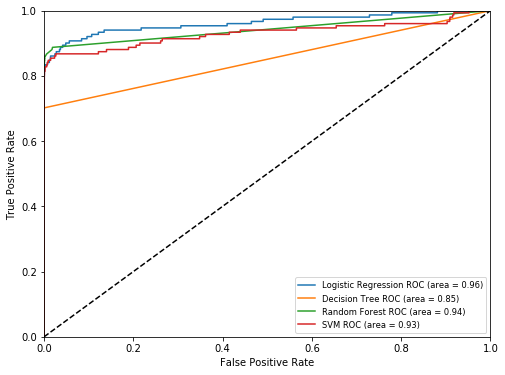

In [43]:
plt.clf()
plt.figure(figsize = (8,6))

for m in models:
    plt.plot(m['fpr'], m['tpr'], label = '%s ROC (area = %0.2f)' % (m['label'], m['auc']))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='small')

<Figure size 432x288 with 0 Axes>

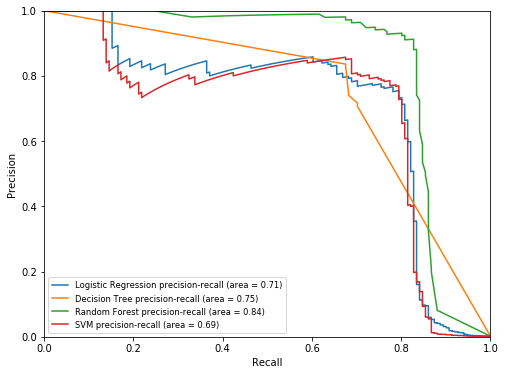

In [44]:
plt.clf()
plt.figure(figsize = (8,6))

for m in models:
    plt.plot(m['recall'], m['precision'], label = '%s precision-recall (area = %0.2f)' % (m['label'], m['pr-auc']))
    
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc=0, fontsize='small')

### Sampling Using SMOTE

Previously, I used undersampling to build my training dataset. Another way to work on imbalanced dataset is to oversample the minority class by duplicate minority examples. The problem with this approach is that the decision boundary will become more specific and ultimately leads to over-fitting. [reference](https://www.cs.cmu.edu/afs/cs/project/jair/pub/volume16/chawla02a-html/node5.html#SECTION00041000000000000000)

In the following part, I will use a very popular sampling method called SMOTE (Synthetic Minority Over-Sampling Technique) and combine it with undersampling. The advantage of SMOTE is that it is creating synthetic examples of minority class so the decision boundary is more general.

In [47]:
from imblearn.over_sampling import SMOTE

In [48]:
# I plan to oversample the minority class by 500% and reach to a balanced dataset.

train_data = X_train.copy()

train_data['Class'] = y_train

fraud_data = train_data[train_data['Class'] == 1]

fraud_size = len(fraud_data)

minor_size = fraud_size*5

non_fraud_data = train_data[train_data['Class'] == 0].sample(n = minor_size, random_state = 101)

SMOTE_data = pd.concat([fraud_data, non_fraud_data])

SMOTE_X = SMOTE_data.drop('Class', axis = 1)

SMOTE_y = SMOTE_data['Class']


### Build Models

Build the same models - logistic regression, decision tree, random forest,SVM

#### Assign Train and Test datasets

In [49]:
SMOTE_X_train = SMOTE_X
SMOTE_X_test = X_test
SMOTE_y_train = SMOTE_y
SMOTE_y_test = y_test

#### Logistic Regression

In [50]:
SMOTE_logit = GridSearchCV(LogisticRegression(solver = 'liblinear'), param_grid={'C':[0.1,0.3,1,3,10,30]}, scoring=recall_score)

SMOTE_logit.fit(SMOTE_X_train,SMOTE_y_train)

SMOTE_logit_predictions = SMOTE_logit.predict(SMOTE_X_test)

SMOTE_logit_prob = SMOTE_logit.predict_proba(SMOTE_X_test)[:,1]

print(classification_report(SMOTE_y_test, SMOTE_logit_predictions))


D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85292
           1       0.18      0.85      0.30       151

    accuracy                           0.99     85443
   macro avg       0.59      0.92      0.65     85443
weighted avg       1.00      0.99      1.00     85443



#### Decision Tree

In [51]:
SMOTE_dtree = RandomizedSearchCV(dtree, param_distributions=dtree_param, scoring=recall_score)

SMOTE_dtree.fit(SMOTE_X_train, SMOTE_y_train)

SMOTE_dtree_predictions = SMOTE_dtree.predict(SMOTE_X_test)

SMOTE_dtree_prob = SMOTE_dtree.predict_proba(SMOTE_X_test)[:,1]

print(classification_report(SMOTE_y_test, SMOTE_dtree_predictions))

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85292
           1       0.07      0.83      0.12       151

    accuracy                           0.98     85443
   macro avg       0.53      0.91      0.56     85443
weighted avg       1.00      0.98      0.99     85443



#### Random Forest

In [52]:
SMOTE_rdforest = RandomizedSearchCV(rdforest, param_distributions=rdforest_param,  scoring=recall_score)

SMOTE_rdforest.fit(SMOTE_X_train, SMOTE_y_train)

SMOTE_rdforest_predictions = SMOTE_rdforest.predict(SMOTE_X_test)

SMOTE_rdforest_prob = SMOTE_rdforest.predict_proba(SMOTE_X_test)[:,1]

print(classification_report(SMOTE_y_test, SMOTE_rdforest_predictions))

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85292
           1       0.42      0.85      0.56       151

    accuracy                           1.00     85443
   macro avg       0.71      0.92      0.78     85443
weighted avg       1.00      1.00      1.00     85443



#### SVM

In [53]:
SMOTE_svm = GridSearchCV(svm ,param_grid = svm_params,scoring=recall_score)

SMOTE_svm.fit(SMOTE_X_train, SMOTE_y_train)

SMOTE_svm_predictions = SMOTE_svm.predict(SMOTE_X_test)

SMOTE_svm_prob = SMOTE_svm.predict_proba(SMOTE_X_test)[:,1]

print(classification_report(SMOTE_y_test, SMOTE_svm_predictions))

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85292
           1       0.10      0.87      0.17       151

    accuracy                           0.99     85443
   macro avg       0.55      0.93      0.58     85443
weighted avg       1.00      0.99      0.99     85443



In [54]:
SMOTE_models = [
    {'label':'Logistic Regression - SMOTE',
     'fpr': roc_curve(SMOTE_y_test,SMOTE_logit_prob)[0],
     'tpr': roc_curve(SMOTE_y_test,SMOTE_logit_prob)[1],
     'auc': auc(roc_curve(SMOTE_y_test,SMOTE_logit_prob)[0], roc_curve(SMOTE_y_test,SMOTE_logit_prob)[1]),
     'precision': precision_recall_curve(SMOTE_y_test,SMOTE_logit_prob)[0],
     'recall': precision_recall_curve(SMOTE_y_test,SMOTE_logit_prob)[1],
     'pr-auc': auc(precision_recall_curve(SMOTE_y_test,SMOTE_logit_prob)[1], precision_recall_curve(SMOTE_y_test,SMOTE_logit_prob)[0])
    },
    {
     'label':'Decision Tree - SMOTE',
     'fpr': roc_curve(SMOTE_y_test,SMOTE_dtree_prob)[0],
     'tpr': roc_curve(SMOTE_y_test,SMOTE_dtree_prob)[1],
     'auc': auc(roc_curve(SMOTE_y_test,SMOTE_dtree_prob)[0], roc_curve(SMOTE_y_test,SMOTE_dtree_prob)[1]),
     'precision': precision_recall_curve(SMOTE_y_test,SMOTE_dtree_prob)[0],
     'recall': precision_recall_curve(SMOTE_y_test,SMOTE_dtree_prob)[1],
     'pr-auc': auc(precision_recall_curve(SMOTE_y_test,SMOTE_dtree_prob)[1], precision_recall_curve(SMOTE_y_test,SMOTE_dtree_prob)[0])  
    },
    {
     'label':'Random Forest - SMOTE',
     'fpr': roc_curve(SMOTE_y_test,SMOTE_rdforest_prob)[0],
     'tpr': roc_curve(SMOTE_y_test,SMOTE_rdforest_prob)[1],
     'auc': auc(roc_curve(SMOTE_y_test,SMOTE_rdforest_prob)[0], roc_curve(SMOTE_y_test,SMOTE_rdforest_prob)[1]),
     'precision': precision_recall_curve(SMOTE_y_test,SMOTE_rdforest_prob)[0],
     'recall': precision_recall_curve(SMOTE_y_test,SMOTE_rdforest_prob)[1],
     'pr-auc': auc(precision_recall_curve(SMOTE_y_test,SMOTE_rdforest_prob)[1], precision_recall_curve(SMOTE_y_test,SMOTE_rdforest_prob)[0])  
    },
    {
     'label':'SVM - SMOTE',
     'fpr': roc_curve(SMOTE_y_test,SMOTE_svm_prob)[0],
     'tpr': roc_curve(SMOTE_y_test,SMOTE_svm_prob)[1],
     'auc': auc(roc_curve(SMOTE_y_test,SMOTE_svm_prob)[0], roc_curve(SMOTE_y_test,SMOTE_svm_prob)[1]),
     'precision': precision_recall_curve(SMOTE_y_test,SMOTE_svm_prob)[0],
     'recall': precision_recall_curve(SMOTE_y_test,SMOTE_svm_prob)[1],
     'pr-auc': auc(precision_recall_curve(SMOTE_y_test,SMOTE_svm_prob)[1], precision_recall_curve(SMOTE_y_test,SMOTE_svm_prob)[0])  
    }  
]

In [55]:
all_models = models + SMOTE_models

<Figure size 432x288 with 0 Axes>

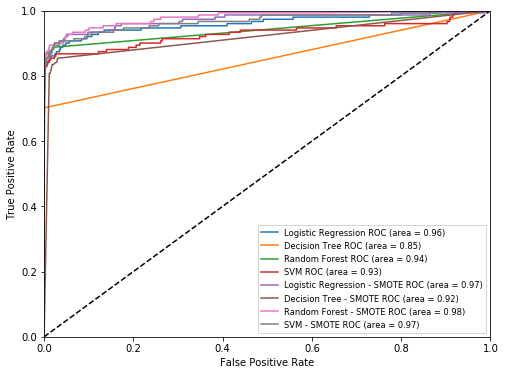

In [56]:
plt.clf()
plt.figure(figsize = (8,6))

for m in all_models:
    plt.plot(m['fpr'], m['tpr'], label = '%s ROC (area = %0.2f)' % (m['label'], m['auc']))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='small')

<Figure size 432x288 with 0 Axes>

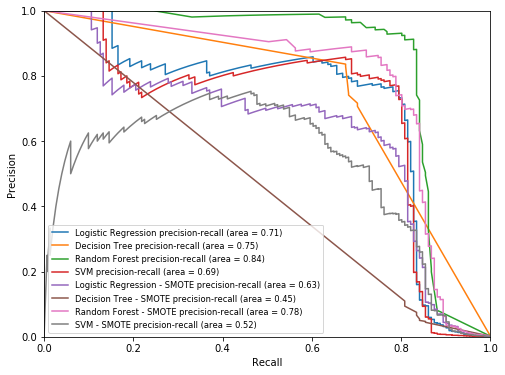

In [57]:
plt.clf()
plt.figure(figsize = (8,6))

for m in all_models:
    plt.plot(m['recall'], m['precision'], label = '%s precision-recall (area = %0.2f)' % (m['label'], m['pr-auc']))
    
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc=0, fontsize='small')